# **Part 1. Develop Regression Models for any real world application and Evaluate the performance using appropriate metrics.**

## **Medical Insurance Cost Prediction Using Linear Regression**

In [1]:
#Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv("insurance.csv")
print("First 5 rows:", df.head())

First 5 rows:    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)
print("Data after encoding:", df.head())

Data after encoding:    age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [4]:
# Define features (X) and target (y)
X = df.drop("charges", axis=1)
y = df["charges"]

In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict on test data
y_pred = model.predict(X_test)

In [8]:
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print("\nModel Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Model Accuracy: {accuracy:.2f}%")


Model Evaluation:
Mean Absolute Error: 4181.19
Mean Squared Error: 33596915.85
Root Mean Squared Error: 5796.28
R² Score: 0.78
Model Accuracy: 78.36%


In [9]:
# Display model coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:\n", coeff_df)
print("\nIntercept:", model.intercept_)


Model Coefficients:
                    Coefficient
age                 256.975706
bmi                 337.092552
children            425.278784
sex_male            -18.591692
smoker_yes        23651.128856
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354

Intercept: -11931.21905032666


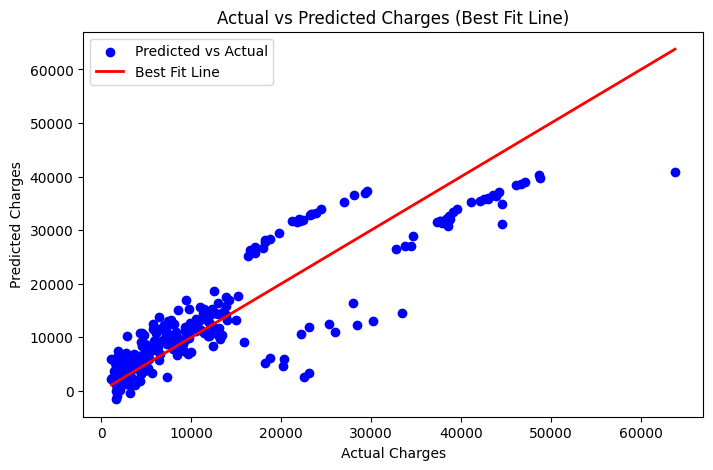

In [10]:
# Visualization: Actual vs Predicted (Best Fit Line)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Best Fit Line')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges (Best Fit Line)")
plt.legend()
plt.show()

In [11]:
# Predict for a custom example
sample = pd.DataFrame({
    'age': [35],
    'bmi': [28],
    'children': [2],
    'sex_male': [1],
    'smoker_yes': [0],
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})

predicted_charge = model.predict(sample)
print(f"\nPredicted Insurance Charge for sample input: {predicted_charge[0]:.2f}")


Predicted Insurance Charge for sample input: 6675.62


# **Part 2. Implement and Analyze the performance of Gradient Descent optimization for Linear Regression.**

In [12]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
# Predicting 'charges' from 'bmi'
x = df['bmi']
y = df['charges']

In [14]:
# Normalize data for faster convergence
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

In [15]:
# Initialize parameters
m = 0   # slope
c = 0   # intercept
alpha = 0.01   # learning rate
epochs = 1000  # number of iterations
n = len(x)

In [16]:
# Store cost (Mean Squared Error) to visualize convergence
cost_history = []

In [17]:
# Gradient Descent Loop
for i in range(epochs):
    y_pred = m * x + c
    D_m = (-2/n) * sum(x * (y - y_pred))
    D_c = (-2/n) * sum(y - y_pred)
    m = m - alpha * D_m
    c = c - alpha * D_c
    # Compute and record cost
    cost = ((y - y_pred) ** 2).mean()
    cost_history.append(cost)

In [18]:
# Print final parameters and evaluation
print("Final Slope (m):", m)
print("Final Intercept (c):", c)

Final Slope (m): 0.19834096849469735
Final Intercept (c): -2.791446876630027e-17


In [19]:
# Final predictions
y_final_pred = m * x + c

In [20]:
# Evaluate model performance
print("R² Score:", r2_score(y, y_final_pred))
print("Mean Squared Error:", mean_squared_error(y, y_final_pred))

R² Score: 0.03933913991786264
Mean Squared Error: 0.9599428773765465


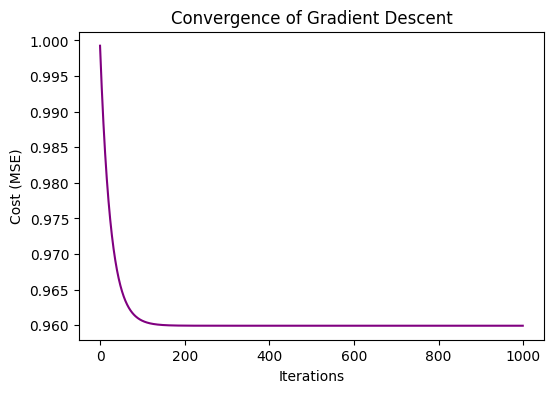

In [21]:
# Plot the cost vs. iteration curve
plt.figure(figsize=(6,4))
plt.plot(range(epochs), cost_history, color='purple')
plt.title("Convergence of Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.show()

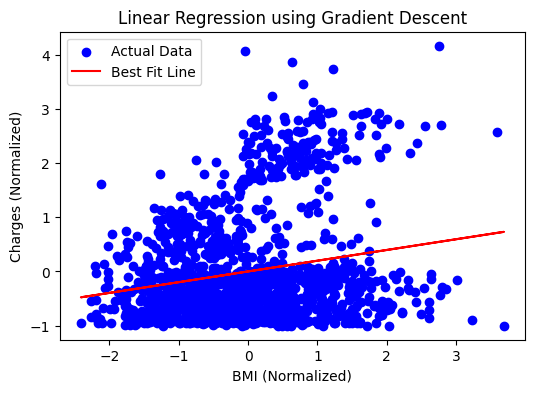

In [22]:
# Plot Best Fit Line
plt.figure(figsize=(6,4))
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, y_final_pred, color='red', label='Best Fit Line')
plt.title("Linear Regression using Gradient Descent")
plt.xlabel("BMI (Normalized)")
plt.ylabel("Charges (Normalized)")
plt.legend()
plt.show()